# Making screenshots programmatically

Making screenshots on the frontent triggered by `plot.fetch_screenshot()` requires special care.
1. One needs to wait for data before it is synchronized. 
2. Before calling `plot.fetch_screenshot()` the plot object must be displayed.

To change dpi of the image one can use for example: `plot.screenshot_scale = 4.0`.


In [1]:
import k3d
import numpy as np
from IPython.display import Image

points_number = 15
spread_range = 30
positions = spread_range * np.random.random_sample((points_number, 3)) - spread_range / 2
colors = np.random.randint(0, 0xFFFFFF, points_number)

plot = k3d.plot(height=240)
points = k3d.points(positions.astype(np.float32), colors.astype(np.uint32), point_size=3.0, shader='mesh')
plot += points

plot.display()

Output()

## Single screenshot

First, let's generate a single screenshot:

In [2]:
plot.fetch_screenshot()

**Note**: this operation is asynchronous.

We need to wait for the widgets to synchronize behind the scenes, before calling the next cell.

In [3]:
with open('screenshot.png', 'wb') as f:
    try:
        out = plot.screenshot.decode('base64')
    except: # Python 3
        from base64 import b64decode
        out = b64decode(plot.screenshot)    
    f.write(out)
    
Image(url='screenshot.png')

## Multiple screenshots 


If we want to generate many screenshots within a single cell, it is possible to do it in a following way:

In [4]:
import ipywidgets

plot.camera_auto_fit = False
plot.grid_auto_fit = False

speeds = -0.5 * np.sign(positions)
out = ipywidgets.Output()

@plot.yield_screenshots
def coroutine():
    global positions
    for i in range(12):
        positions += speeds
        points.positions = positions.astype(np.float32)
        plot.fetch_screenshot()
        screenshot = yield
        with open('screenshot_%03d.png'%i, 'wb') as f:
            f.write(screenshot)
        with out:
            print('screenshot_%03d.png saved.'%i)
    with out:
        print('done.')

coroutine()
print('loop is running in background...')
out

loop is running in background...


Output()

In [5]:
!convert screenshot_*.png screenshot.gif && rm screenshot_*.png

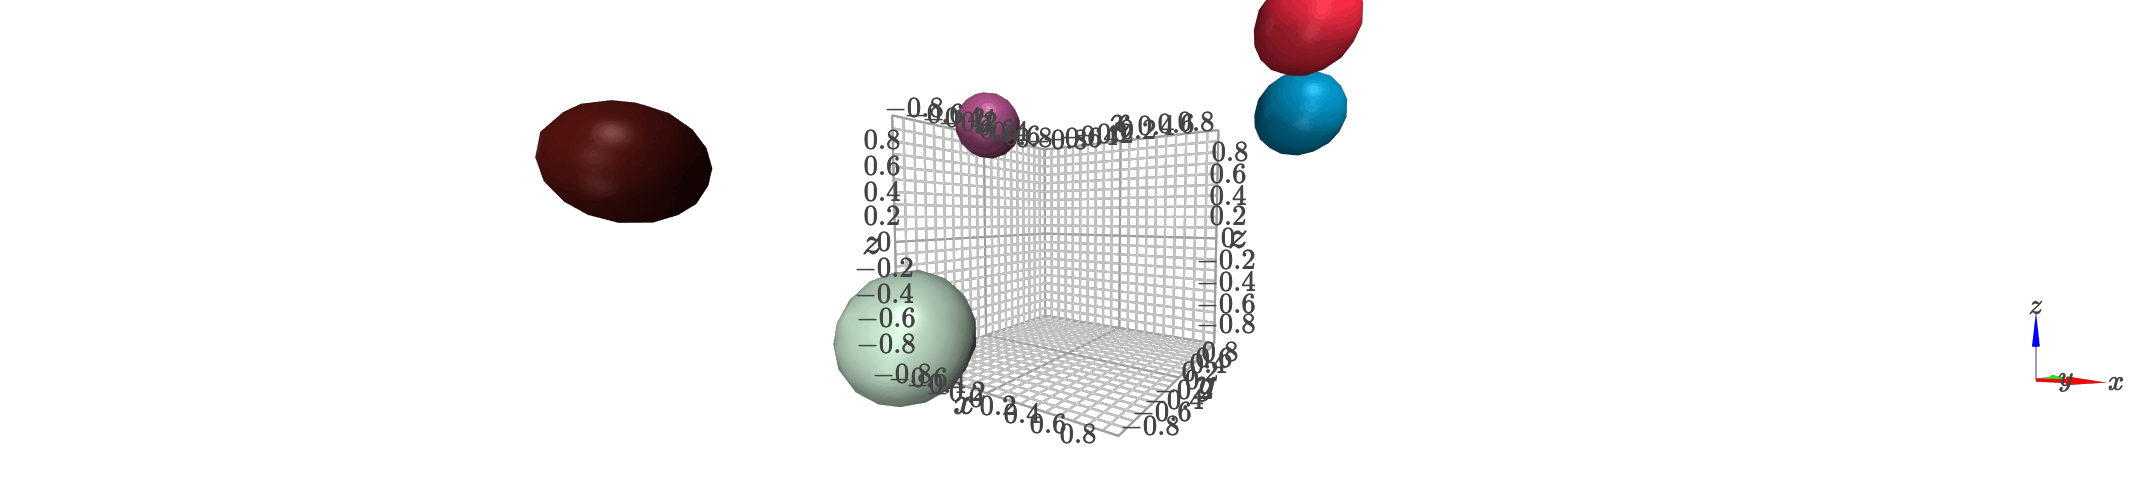

In [6]:
Image('screenshot.gif')